Iris Classification
==============

In [1]:
import numpy as np

%matplotlib notebook

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_wine

from pyautospec import parallel_plot, DatasetMps

<IPython.core.display.Javascript object>


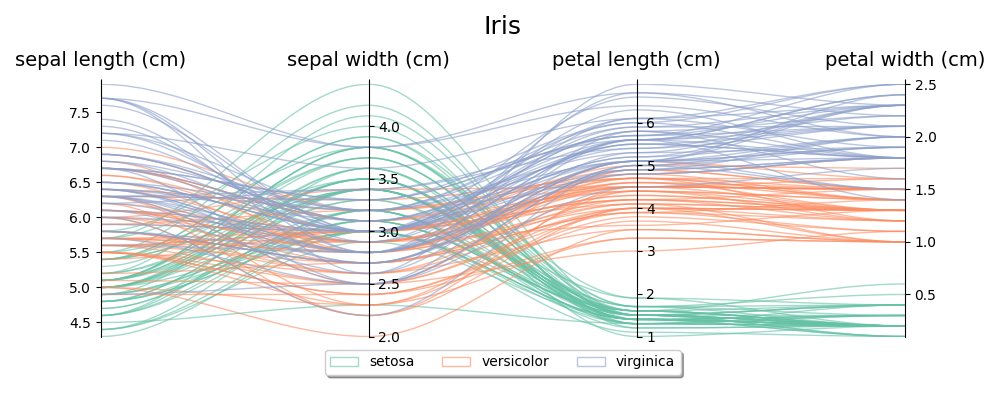

In [2]:
iris = load_iris()

X_iris, y_iris = iris.data, iris.target

parallel_plot(X_iris, y_iris, iris.feature_names, iris.target_names, title = "Iris")

In [3]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=1)

iris_mps = DatasetMps(4, x0=0.95*np.min(X_iris, axis=0), x1=1.05*np.max(X_iris, axis=0), class_n=3)

iris_mps.fit(X_iris_train, y_iris_train, learn_rate=0.1, batch_size=5, epochs = 100)

iris_mps

  0%|          | 0/100 [00:00<?, ?it/s]

epoch   10: avg=0.00 std=0.01
epoch   20: avg=0.00 std=0.01
epoch   30: avg=0.00 std=0.01
epoch   40: avg=0.00 std=0.01
epoch   50: avg=0.00 std=0.01
epoch   60: avg=0.00 std=0.01
epoch   70: avg=0.00 std=0.00
epoch   80: avg=0.00 std=0.00
epoch   90: avg=0.00 std=0.01
epoch  100: avg=0.00 std=0.01


  0%|          | 0/100 [00:00<?, ?it/s]

epoch   10: avg=0.06 std=0.08
epoch   20: avg=0.05 std=0.08
epoch   30: avg=0.05 std=0.07
epoch   40: avg=0.08 std=0.13
epoch   50: avg=0.06 std=0.08
epoch   60: avg=0.05 std=0.08
epoch   70: avg=0.05 std=0.08
epoch   80: avg=0.05 std=0.08
epoch   90: avg=0.05 std=0.07
epoch  100: avg=0.05 std=0.09


  0%|          | 0/100 [00:00<?, ?it/s]

epoch   10: avg=0.04 std=0.07
epoch   20: avg=0.04 std=0.07
epoch   30: avg=0.04 std=0.07
epoch   40: avg=0.04 std=0.07
epoch   50: avg=0.04 std=0.06
epoch   60: avg=0.04 std=0.08
epoch   70: avg=0.04 std=0.07
epoch   80: avg=0.04 std=0.07
epoch   90: avg=0.04 std=0.07
epoch  100: avg=0.04 std=0.07


  DatasetMps(classification)
  class:  0 -------------
  ╭───┐ ╭───┐       ╭───┐
  │ 1 ├─┤ 2 ├─ ... ─┤  4│
  └─┬─┘ └─┬─┘       └─┬─┘

  particle dim:   2
      bond dim:   2 (max: 20)
        
  class:  1 -------------
  ╭───┐ ╭───┐       ╭───┐
  │ 1 ├─┤ 2 ├─ ... ─┤  4│
  └─┬─┘ └─┬─┘       └─┬─┘

  particle dim:   2
      bond dim:   2 (max: 20)
        
  class:  2 -------------
  ╭───┐ ╭───┐       ╭───┐
  │ 1 ├─┤ 2 ├─ ... ─┤  4│
  └─┬─┘ └─┬─┘       └─┬─┘

  particle dim:   2
      bond dim:   2 (max: 20)
        

In [4]:
print("accuracy (train): {:.1f}%".format(100 * iris_mps.score(X_iris_train, y_iris_train)))
print("accuracy (test):  {:.1f}%".format(100 * iris_mps.score(X_iris_test, y_iris_test)))

accuracy (train): 97.1%
accuracy (test):  100.0%


Wine Classification
================

<IPython.core.display.Javascript object>


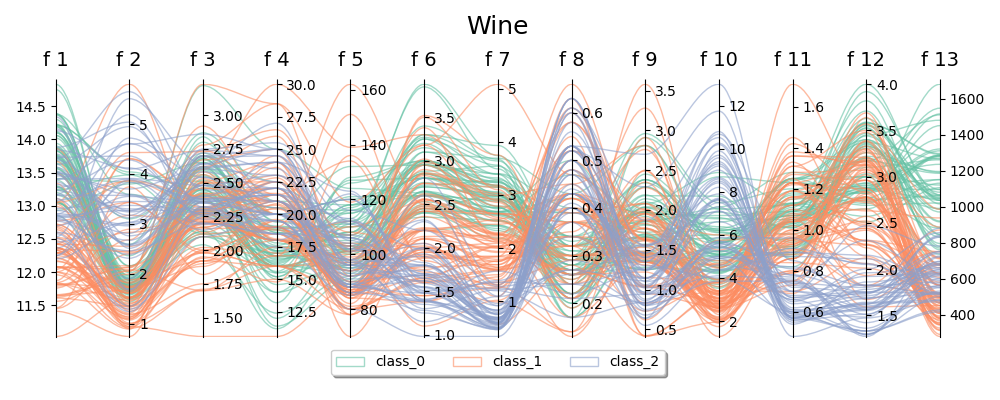

In [5]:
wine = load_wine()

X_wine, y_wine = wine.data, wine.target

parallel_plot(X_wine, y_wine, None, wine.target_names, title = "Wine")

In [6]:
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

wine_mps = DatasetMps(13, x0=0.95*np.min(X_wine, axis=0), x1=1.05*np.max(X_wine, axis=0), max_bond_dim=2, class_n=3)

wine_mps.fit(X_wine_train, y_wine_train, X_wine_test, y_wine_test, learn_rate=0.1, batch_size=10, epochs=1000)

wine_mps

  0%|          | 0/1000 [00:00<?, ?it/s]

epoch   10: train avg=0.05 std=0.12 | test avg=0.07 std=0.11
epoch   20: train avg=0.04 std=0.08 | test avg=0.05 std=0.07
epoch   30: train avg=0.03 std=0.07 | test avg=0.04 std=0.06
epoch   40: train avg=0.03 std=0.06 | test avg=0.03 std=0.05
epoch   50: train avg=0.02 std=0.05 | test avg=0.03 std=0.05
epoch   60: train avg=0.02 std=0.05 | test avg=0.02 std=0.04
epoch   70: train avg=0.02 std=0.04 | test avg=0.02 std=0.04
epoch   80: train avg=0.02 std=0.04 | test avg=0.02 std=0.04
epoch   90: train avg=0.02 std=0.04 | test avg=0.02 std=0.04
epoch  100: train avg=0.02 std=0.04 | test avg=0.02 std=0.03
epoch  110: train avg=0.02 std=0.04 | test avg=0.02 std=0.03
epoch  120: train avg=0.02 std=0.03 | test avg=0.02 std=0.03
            overfitting detected: test score is rising over moving average
            training interrupted


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch   10: train avg=0.35 std=0.49 | test avg=0.22 std=0.25
epoch   20: train avg=0.16 std=0.26 | test avg=0.12 std=0.15
epoch   30: train avg=0.14 std=0.23 | test avg=0.11 std=0.15
epoch   40: train avg=0.13 std=0.22 | test avg=0.11 std=0.15
epoch   50: train avg=0.12 std=0.20 | test avg=0.10 std=0.16
epoch   60: train avg=0.11 std=0.19 | test avg=0.10 std=0.16
epoch   70: train avg=0.11 std=0.19 | test avg=0.10 std=0.16
epoch   80: train avg=0.11 std=0.18 | test avg=0.10 std=0.16
epoch   90: train avg=0.10 std=0.17 | test avg=0.10 std=0.17
epoch  100: train avg=0.10 std=0.17 | test avg=0.09 std=0.14
epoch  110: train avg=0.10 std=0.16 | test avg=0.09 std=0.14
epoch  120: train avg=0.09 std=0.15 | test avg=0.09 std=0.15
epoch  130: train avg=0.09 std=0.15 | test avg=0.08 std=0.14
epoch  140: train avg=0.09 std=0.14 | test avg=0.08 std=0.14
epoch  150: train avg=0.08 std=0.13 | test avg=0.08 std=0.13
epoch  160: train avg=0.08 std=0.12 | test avg=0.08 std=0.14
epoch  170: train avg=0.

  0%|          | 0/1000 [00:00<?, ?it/s]

epoch   10: train avg=0.08 std=0.12 | test avg=0.09 std=0.16
epoch   20: train avg=0.06 std=0.10 | test avg=0.07 std=0.13
epoch   30: train avg=0.04 std=0.08 | test avg=0.06 std=0.13
epoch   40: train avg=0.03 std=0.07 | test avg=0.05 std=0.12
epoch   50: train avg=0.03 std=0.06 | test avg=0.05 std=0.13
epoch   60: train avg=0.02 std=0.05 | test avg=0.05 std=0.13
epoch   70: train avg=0.02 std=0.05 | test avg=0.05 std=0.13
epoch   80: train avg=0.02 std=0.04 | test avg=0.04 std=0.14
epoch   90: train avg=0.02 std=0.04 | test avg=0.04 std=0.14
epoch  100: train avg=0.02 std=0.04 | test avg=0.04 std=0.15
epoch  110: train avg=0.01 std=0.04 | test avg=0.04 std=0.14
epoch  120: train avg=0.02 std=0.04 | test avg=0.04 std=0.13
epoch  130: train avg=0.01 std=0.03 | test avg=0.04 std=0.14
epoch  140: train avg=0.01 std=0.03 | test avg=0.04 std=0.13
epoch  150: train avg=0.01 std=0.03 | test avg=0.04 std=0.13
            overfitting detected: test score is rising over moving average
          

  DatasetMps(classification)
  class:  0 -------------
  ╭───┐ ╭───┐       ╭───┐
  │ 1 ├─┤ 2 ├─ ... ─┤ 13│
  └─┬─┘ └─┬─┘       └─┬─┘

  particle dim:   2
      bond dim:   2 (max: 2)
        
  class:  1 -------------
  ╭───┐ ╭───┐       ╭───┐
  │ 1 ├─┤ 2 ├─ ... ─┤ 13│
  └─┬─┘ └─┬─┘       └─┬─┘

  particle dim:   2
      bond dim:   2 (max: 2)
        
  class:  2 -------------
  ╭───┐ ╭───┐       ╭───┐
  │ 1 ├─┤ 2 ├─ ... ─┤ 13│
  └─┬─┘ └─┬─┘       └─┬─┘

  particle dim:   2
      bond dim:   2 (max: 2)
        

In [7]:
print("accuracy (train): {:.1f}%".format(100 * wine_mps.score(X_wine_train, y_wine_train)))
print("accuracy (test):  {:.1f}%".format(100 * wine_mps.score(X_wine_test, y_wine_test)))

accuracy (train): 100.0%
accuracy (test):  96.3%
